Student Names: Bobby Sokhi (100355678) - Talha Ghumra - Cameron Jordan

Part 1: Data - Pre - Processing.

Importing the necessary libraries that are needed for data visualization and data analysis.

In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

Importing the healthcare dataset obtained from 'Kaggle' into python.

In [163]:
data_set = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = pd.DataFrame(data_set)

Visualizing the dataset.

In [164]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Dropping the 'id' column from the dataset since a patients 'id' only distinguishes them from other patients rather than 
helping our model that is going to be developed to predict the likelihood of stroke.

In [165]:
df.drop(['id'], axis = 1, inplace = True)

Visualizing the dataset.

In [166]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Checking if there is any null values in the dataset.

In [167]:
df.isnull().any().any()

True

Checking if there is any null values in each column.

In [168]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

Replacing the null values in the 'BMI' column with the average of that column.

In [169]:
df['bmi'].fillna(df['bmi'].mean(), inplace = True)

Visualizing the dataset.

In [170]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Checking how many 'unique' entries we have in each column.

In [171]:
print("Unique 'Gender': {}".format(df['gender'].unique()))
print("Unique 'Martial Status': {}".format(df['ever_married'].unique()))
print("Unique 'Work Type': {}".format(df['work_type'].unique()))
print("Unique 'Residence Type': {}".format(df['Residence_type'].unique()))
print("Unique 'Smoking Status': {}".format(df['smoking_status'].unique()))

Unique 'Gender': ['Male' 'Female' 'Other']
Unique 'Martial Status': ['Yes' 'No']
Unique 'Work Type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence Type': ['Urban' 'Rural']
Unique 'Smoking Status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Checking the value count of each column with unique entries.

In [172]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [173]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [174]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [175]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [176]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Since the count of 'other' in the 'gender' column = 1 we will change it into a Male.

In [177]:
df['gender']=df['gender'].replace('Other','Male')

Visualizing the gender column after the transformation.

In [178]:
df.gender.value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

Converting categorical data into numerical data.

In [179]:
from sklearn.preprocessing import LabelEncoder
cat_encoder = LabelEncoder()
df['gender'] = cat_encoder.fit_transform(df['gender'])
df['ever_married'] = cat_encoder.fit_transform(df['ever_married'])
df['work_type'] = cat_encoder.fit_transform(df['work_type'])
df['Residence_type'] = cat_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = cat_encoder.fit_transform(df['smoking_status'])

Visualizing the dataset with the above applied transformation.

In [180]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


Part 2: Data Analysis.

Checking for any outliers using a Box Plot.

<AxesSubplot:ylabel='hypertension'>

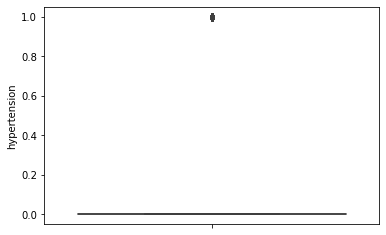

In [181]:
sns.boxplot(y = df['hypertension'])

<AxesSubplot:ylabel='heart_disease'>

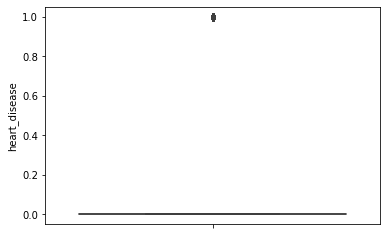

In [182]:
sns.boxplot(y = df['heart_disease'])

<AxesSubplot:ylabel='avg_glucose_level'>

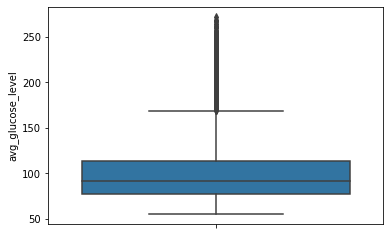

In [183]:
sns.boxplot(y = df['avg_glucose_level'])

<AxesSubplot:ylabel='bmi'>

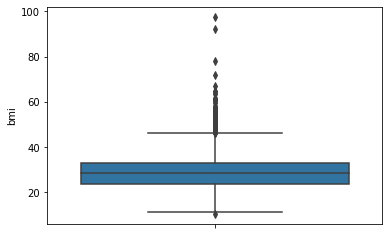

In [184]:
sns.boxplot(y = df['bmi'])

Getting a general idea about the distribution of data.

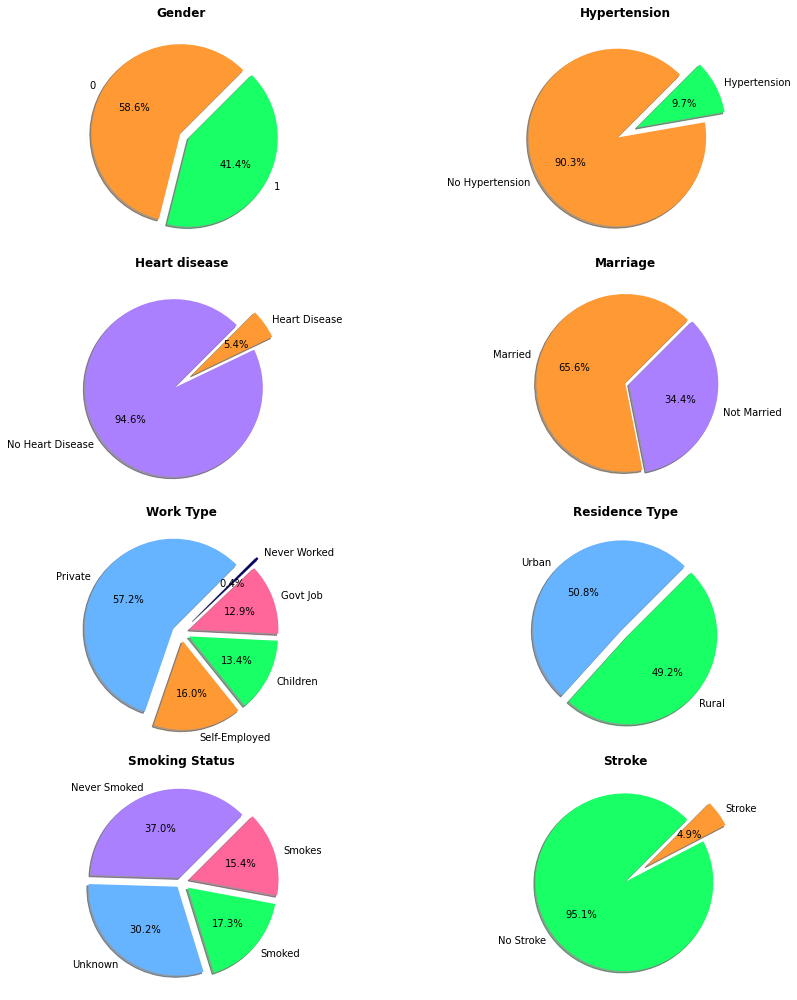

In [185]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df['gender'].value_counts().index.tolist()[:2]
values = df['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = df['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = df['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AA80FF','#FF9933'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = df['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FF9933','#AA80FF'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = df['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = df['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#19FF66'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Never Smoked", "Unknown", "Smoked", "Smokes"]
values = df['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1],colors=['#AA80FF','#66b3ff','#19FF66','#FF6699'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = df['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#19FF66','#FF9933'])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

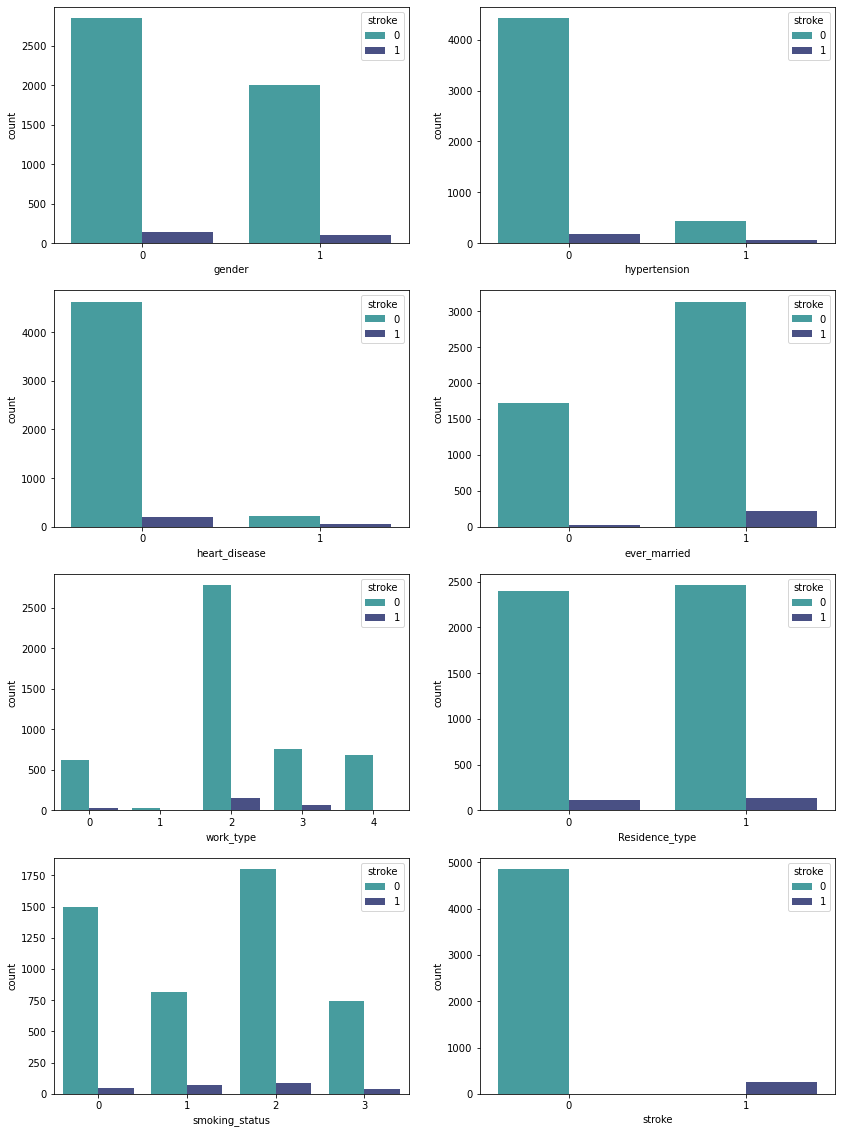

In [186]:
df_st=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    sns.countplot(x=col_name, data=df, ax=axs[i], hue =df['stroke'],palette='mako_r')

Visualizing the correlation between variables for the dataset.

In [187]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.027924,0.021143,0.085617,-0.030483,0.056532,-0.006340,0.054902,-0.025797,-0.062496,0.009027
age,-0.027924,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.021143,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,0.085617,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,-0.030483,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,0.056532,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.006340,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.054902,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,-0.025797,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947
smoking_status,-0.062496,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


Dealing with 'Imbalanced Data':

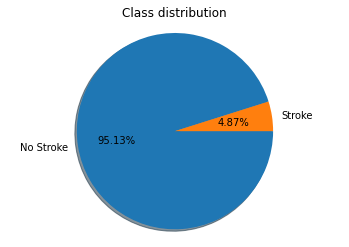

# samples associated with no stroke: 4861
# samples associated with stroke: 249


In [188]:
class_occur = df['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

In [189]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

X, Y = smote.fit_resample(df.loc[:,df.columns!='stroke'], df['stroke'])
print("Shape of X: {}".format(X.shape))
print("Shape of Y: {}".format(Y.shape))
print(X)
print(Y)

Shape of X: (9722, 10)
Shape of Y: (9722,)
      gender        age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.000000             0              1             1          2   
1          0  61.000000             0              0             1          3   
2          1  80.000000             0              1             1          2   
3          0  49.000000             0              0             1          2   
4          0  79.000000             1              0             1          3   
...      ...        ...           ...            ...           ...        ...   
9717       0  51.033693             0              0             1          0   
9718       0  44.194287             0              0             1          2   
9719       0  78.100820             1              0             0          3   
9720       1  67.303475             0              0             1          2   
9721       0  70.049885             0              0             1

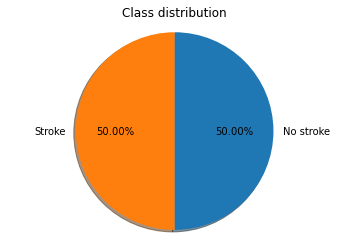

# samples associated with no stroke: 4861
# samples associated with stroke: 4861


In [190]:
_, class_counts = np.unique(Y, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

Part 3: Data Classification.

Splitting the dataset into training and testing splits for predicition.

In [191]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

Scaling the training and testing splits.

In [192]:
from sklearn.preprocessing import StandardScaler
normal_to_scaler = StandardScaler()

x_train = normal_to_scaler.fit_transform(x_train)
x_test = normal_to_scaler.fit_transform(x_test)

Training and Building Models.

Method 1: Logisitc Regression

Defining the search space and tuning the hyper parameters.

In [193]:
param_grid_lr = { "penalty" : ['l1', 'l2'], 'C' : np.logspace(-4,4,20),}

In [194]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
LR = LogisticRegression()
grid_lr = GridSearchCV(LR,param_grid_lr,cv = 10)
grid_lr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00e-04, 2.64e-04, 6.95e-04, 1.83e-03, 4.83e-03, 1.27e-02,
       3.36e-02, 8.86e-02, 2.34e-01, 6.16e-01, 1.62e+00, 4.28e+00,
       1.13e+01, 2.98e+01, 7.85e+01, 2.07e+02, 5.46e+02, 1.44e+03,
       3.79e+03, 1.00e+04]),
                         'penalty': ['l1', 'l2']})

In [195]:
grid_lr.best_score_

0.7986385577645218

In [196]:
grid_lr.best_params_

{'C': 0.012742749857031334, 'penalty': 'l2'}

In [197]:
grid_lr.best_estimator_

LogisticRegression(C=0.012742749857031334)

Now we do the exact same thing but instead use RandomizedSearchCV.

In [198]:
from sklearn.model_selection import RandomizedSearchCV
random_lr = RandomizedSearchCV(LR,param_grid_lr,cv = 10)
random_lr.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00e-04, 2.64e-04, 6.95e-04, 1.83e-03, 4.83e-03, 1.27e-02,
       3.36e-02, 8.86e-02, 2.34e-01, 6.16e-01, 1.62e+00, 4.28e+00,
       1.13e+01, 2.98e+01, 7.85e+01, 2.07e+02, 5.46e+02, 1.44e+03,
       3.79e+03, 1.00e+04]),
                                        'penalty': ['l1', 'l2']})

In [199]:
random_lr.best_score_

0.7978671841139707

In [200]:
random_lr.best_params_

{'penalty': 'l2', 'C': 0.03359818286283781}

In [201]:
random_lr.best_estimator_

LogisticRegression(C=0.03359818286283781)

In [202]:
lr = LogisticRegression(C=0.23357214690901212)
lr.fit(x_train,y_train)
y_pred_1=lr.predict(x_test)

In [203]:
print(y_pred_1)

[0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1
 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0
 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0
 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0
 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1
 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1
 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 1 1 1 0 0 1 1 

In [204]:
y_pred_1_prob = lr.predict_proba(x_test)
y_pred_1_prob

array([[0.99, 0.01],
       [0.06, 0.94],
       [0.67, 0.33],
       [0.85, 0.15],
       [0.11, 0.89],
       [0.26, 0.74],
       [0.93, 0.07],
       [0.87, 0.13],
       [0.7 , 0.3 ],
       [0.69, 0.31],
       [0.1 , 0.9 ],
       [0.78, 0.22],
       [0.91, 0.09],
       [0.07, 0.93],
       [0.09, 0.91],
       [0.78, 0.22],
       [0.34, 0.66],
       [0.44, 0.56],
       [0.99, 0.01],
       [0.77, 0.23],
       [0.36, 0.64],
       [0.91, 0.09],
       [0.85, 0.15],
       [0.25, 0.75],
       [0.42, 0.58],
       [0.74, 0.26],
       [0.57, 0.43],
       [0.08, 0.92],
       [0.35, 0.65],
       [0.32, 0.68],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.33, 0.67],
       [0.2 , 0.8 ],
       [0.67, 0.33],
       [0.85, 0.15],
       [0.09, 0.91],
       [0.04, 0.96],
       [0.56, 0.44],
       [0.94, 0.06],
       [0.25, 0.75],
       [0.32, 0.68],
       [0.76, 0.24],
       [0.97, 0.03],
       [0.25, 0.75],
       [0.45, 0.55],
       [0.83, 0.17],
       [0.4 ,

Obtaining the accuracy score of the model:

In [205]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_1))

0.7974293059125964


Visualizing the Confusion Matrix:

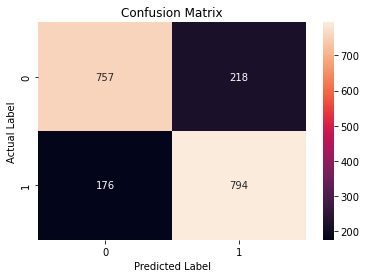

In [206]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_1)
import seaborn as sns
import matplotlib.pyplot as plt

class_label = ["0", "1"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Saving the best machine learning model:

In [207]:
import pickle

pickle.dump(lr, open('model.pkl', 'wb'))